### Import Packages 

In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import requests
import nltk
import scrapy
#nltk.download('stopwords') - gotta run this first time
#nltk.download('punkt')
import re
import urllib
import html2text
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist
import matplotlib.pyplot as plt
import seaborn as sns
import string 
%matplotlib inline
sns.set()
alphabet_string = string.ascii_lowercase
alphabet_list = list(alphabet_string)
stop_words = list(set(stopwords.words('english')))
nltk_stopwords_list = stopwords.words('english')
nltk_stopwords_list += alphabet_list
nltk_stopwords_list += list(string.punctuation)
nltk_stopwords_list += ['schools' ,'school', '\'s','contact','us','facebook','grade','calendar']
blacklist = ['noscript','header','html','meta','head', 'input','script','style','header','footer']
socialMediaList = ['facebook','twitter','instagram','youtube','linkedin','google analytic']
socialMediaDataFrame = pd.DataFrame(columns=socialMediaList)
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36',
            "Accept-Encoding": "*",
            "Connection": "keep-alive"}

### Custom Functions to Add Here

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

### Import CSV for Charter School Hyper Link and Clean Links

In [2]:
importedCharterSchoolData=pd.read_csv("D:/Dropbox/CharterSchoolWebAnalysis/CharterSchools.csv")
pattern = 'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\), ]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
importedCharterSchoolData['URL School Address']=importedCharterSchoolData['URL School Address'].astype(str)
importedCharterSchoolData['URL School Address']=importedCharterSchoolData['URL School Address'].where((importedCharterSchoolData['URL School Address'].str.contains(pattern)) , "https://" + importedCharterSchoolData['URL School Address'])
urlCharterSchoolList=list(importedCharterSchoolData['URL School Address'])  

### WebScrap based on HyperLink

In [185]:
#fake a header 
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
hyperLinkTemplate = "https://www.charlottelabschool.org/"
RequestedPage= requests.get(hyperLinkTemplate, headers =headers)
if (RequestedPage.status_code != 200):
    print (hyperLinkTemplate + " does not work please check hyperlink again")
soup = BeautifulSoup(RequestedPage.content,'html.parser')

In [186]:
for script in soup(["script", "style"]):
    script.decompose()    # rip it out
# get text
text = soup.get_text()
# break into lines and remove leading and trailing space on each
lines = (line.strip() for line in text.splitlines())
# break multi-headlines into a line each
chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
# drop blank lines
text = '\n'.join(chunk for chunk in chunks if chunk)
#remove \n new lines out
text=text.replace('\n', ' ')

In [187]:
tokenized_list=word_tokenize(text)
tokenized_list=[x.lower() for x in tokenized_list]
cleaned_and_tokenized_list = [w.lower() for w in tokenized_list if w not in nltk_stopwords_list]
cleaned_freqdist = FreqDist(cleaned_and_tokenized_list)

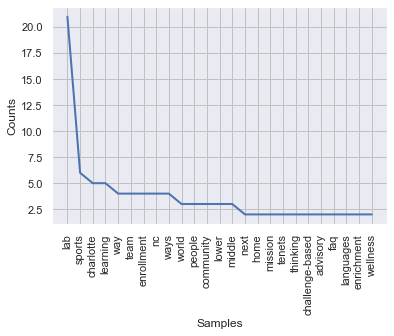

In [188]:
cleaned_freqdist.plot(25)

In [109]:
importedCharterSchoolData=pd.read_csv('D:/Dropbox/CharterSchoolWebAnalysis/CharterSchools.csv')
url = re.compile(r"https?://(www\.)?")
pattern = 'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\), ]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
importedCharterSchoolData['URL School Address']=importedCharterSchoolData['URL School Address'].astype(str)
importedCharterSchoolData['URL School Address']=importedCharterSchoolData['URL School Address'].where((importedCharterSchoolData['URL School Address'].str.contains(pattern)) , "https://" + importedCharterSchoolData['URL School Address'])
urlCharterSchoolList=list(importedCharterSchoolData['URL School Address'])  
urlCharterSchoolListDomain=list(importedCharterSchoolData['URL School Address'].str.replace(url, ''))
len (list(importedCharterSchoolData['URL School Address'].str.replace(url, '')))

196

In [112]:
allImportedLinks=pd.read_csv("correctedDomains.csv")
list_allImportedLinks=list(allImportedLinks['domain'].unique())

len(urlCharterSchoolListDomain)
len(list_allImportedLinks)

191

In [113]:
def intersection(lst1, lst2): 
    lst3 = [value for value in lst1 if value in lst2] 
    return lst3 
def Diff(li1, li2): 
    li_dif = [i for i in li1 + li2 if i not in li1 or i not in li2] 
    return li_dif 
linksTheSame= intersection(list_allImportedLinks,urlCharterSchoolListDomain)
len(linksTheSame)
Diff(list_allImportedLinks,urlCharterSchoolListDomain)
runAgainLinks=Diff(list_allImportedLinks,urlCharterSchoolListDomain)
runAgainLinks

['columbuscharterschool.net',
 'kippenc.org/school-details/kipp-durham-college-prep-public-school/',
 'southeasternacademy.org/',
 'successinstitutecharterschool.com']

In [94]:
allImportedLinks.loc[allImportedLinks['url_from'] == 'https://globalscholarsacademy.org/', 'domain']= 'globalscholarsacademy.org/'
allImportedLinks.loc[allImportedLinks['url_from'] == 'https://www.iredellcharter.org/', 'domain']= 'iredellcharter.org'
allImportedLinks.to_csv('correctedDomains.csv')

In [12]:
### Clean up op on url domains
modelingRecord = pd.read_csv('modelingRecord.csv')
modelingRecord['corpusFileName']=modelingRecord['urlDomain'].str.replace('/' , '')
modelingRecord.to_csv('modelingRecord.csv')

In [19]:
# modelingRecord = pd.read_csv('UpdatedCharterSchools.csv')
# modelingRecord=modelingRecord[['Poverty Level','Official School Name',
#                 'School Physical Address','School Physical Address City',
#                 'School Physical Address State','School Physical Address Zip','County Description']]
# modelingRecord['urlDomain'] = urlCharterSchoolListDomain
# modelingRecord['urlAddress'] = urlCharterSchoolList
#modelingRecord.to_csv('modelingRecord.csv')
# modelingRecord
# copyOfDf=pd.merge(modelingRecord,allImportedLinks, left_on = 'urlDomain', right_on = ['domain'] , how = 'right' )
#copyOfDf['corpusFileName']=copyOfDf['urlDomain'].str.replace('/' , '')
#copyOfDf.to_csv('modelingRecordWithLinks.csv')
copyOfDf = pd.read_csv('modelingRecordWithLinks.csv') 

In [5]:
# import urllib3
# import time
# urllib3.disable_warnings()
# requests.packages.urllib3.util.ssl_.DEFAULT_CIPHERS='ALL'
# #Exclude use of pyopenssl (pyopenssl module may need to be installed first $pip install pyopenssl)
# requests.packages.urllib3.contrib.pyopenssl.extract_from_urllib3()
# listofAllUrlLink = list(copyOfDf['url_to'])
# listOfFileName=list(copyOfDf['corpusFileName'])
# #listOfAllUrlLink = ['https://www.aceacademycharter.org/']

# for (eachFileName,eachUrlLink) in zip(listOfFileName,listofAllUrlLink):
#     corpusFile = open(f'D:/Dropbox/CharterSchoolWebAnalysis/charterSchoolCorpus/{eachFileName}.text' ,'a', encoding="utf-8") 
#     try:
#         RequestedPage= requests.get(eachUrlLink, headers =headers, verify=False, timeout=100 )
#     except:
#         print(f'serious issues with this link {eachUrlLink}')
    
#     if (RequestedPage.status_code != 200):
#         print (eachUrlLink + " does not work please check hyperlink again")
#     else:
#         soup = BeautifulSoup(RequestedPage.content,'html.parser')
#         for script in soup(["script", "style"]):
#             script.decompose()    # rip it out
#             # get text
#         text = soup.get_text()
#             # break into lines and remove leading and trailing space on each
#         lines = (line.strip() for line in text.splitlines())
#             # break multi-headlines into a line each
#         chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
#             # drop blank lines
#         text = '\n'.join(chunk for chunk in chunks if chunk)
#             #remove \n new lines out
#         text=text.replace('\n', ' ')
#         tokenized_list=word_tokenize(text)
#         tokenized_list=[x.lower() for x in tokenized_list]
#         cleaned_and_tokenized_list = [w.lower() for w in tokenized_list if w not in nltk_stopwords_list]

#         for item in cleaned_and_tokenized_list:
#             corpusFile.write("%s\n" % item)    
#         corpusFile.close()


https://www.aceacademycharter.org/apps/pages/index.jsp?pREC_ID=933341&type=d&uREC_ID=1048747 does not work please check hyperlink again
https://www.aceacademycharter.org/apps/pages/index.jsp?pREC_ID=933259&type=d&uREC_ID=427648 does not work please check hyperlink again
https://www.alphaacademy.education/tel:9102237711 does not work please check hyperlink again
https://www.alphaacademy.education/tel:9106789011 does not work please check hyperlink again
http://www.artspacecharter.org/?page_id=8513 does not work please check hyperlink again
http://www.artspacecharter.org/news does not work please check hyperlink again
https://beargrasscharter.org/about-us/bgcs-admissions-and-enrollment/ does not work please check hyperlink again
https://www.bradfordprep.org/apps/pages/index.jsp?pREC_ID=1217177&type=d&uREC_ID=849446 does not work please check hyperlink again
https://carolina.teamcfa.school/enrollment/how-to-enroll/ does not work please check hyperlink again
https://carolina.teamcfa.school

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


http://www.csdspartans.org/for_parents/HotLunch does not work please check hyperlink again
http://www.csdspartans.org/cms/www.csdPowerofWe.org does not work please check hyperlink again
http://www.corvian.org/protected/MasterCalendar.aspx?d=&dasi=4YG32&e=&g=&vs=13 does not work please check hyperlink again
https://www.corvian.org/protected/ArticleArchive.aspx?a=&cp=1Z&dasi=4G3GI&ed=&n=&p=5A2GAB&q=&sd=&vs=1G does not work please check hyperlink again
http://www.douglassacademy.net/newsandupdates/category/blog/ does not work please check hyperlink again
https://enoriveracademy.org/tel:9196446272 does not work please check hyperlink again
http://www.franklinacademy.org/+19195544911 does not work please check hyperlink again
http://www.franklinacademy.org/+19195708262 does not work please check hyperlink again
http://www.franklinacademy.org/+19194535090 does not work please check hyperlink again
https://globalscholarsacademy.org/tel:9196825903 does not work please check hyperlink again
htt

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


https://www.healthystartacademy.org/apps/pages/index.jsp?pREC_ID=1433846&type=d&uREC_ID=1190134 does not work please check hyperlink again
http://hendersoncollegiate.org/tell:2525722514 does not work please check hyperlink again
http://hendersoncollegiate.org/tell:2525981038 does not work please check hyperlink again
http://hendersoncollegiate.org/tell:2525981039 does not work please check hyperlink again
serious issues with this link https://hobgoodcharterschool.org/
https://hobgoodcharterschool.org/tel:2522421880 does not work please check hyperlink again
http://sites.icimagine.org/scopes/ does not work please check hyperlink again
serious issues with this link https://apply.iredellcharter.org/apply/
http://www.islandmontessorischool.com/preschool.html does not work please check hyperlink again
http://www.islandmontessorischool.com/charter.html does not work please check hyperlink again
serious issues with this link https://apply.langtreecharter.org/apply/
serious issues with this li

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


https://www.movementschool.com/about-movement/ does not work please check hyperlink again
serious issues with this link https://www.movementschool.com/school-nutrition-non-discrimination-statement/
serious issues with this link https://www.movementschool.com/local-wellness-policy/
https://ncva.k12.com/tel:8556693660 does not work please check hyperlink again
http://nextgenerationacademy.net/news-list-vc/ does not work please check hyperlink again
http://www.paulrbrownleadership.com/under-construction.html does not work please check hyperlink again
serious issues with this link https://www.pahp.com/middle-school/
serious issues with this link https://www.pahp.com/high-school/
serious issues with this link https://www.pahp.com/lottery/
serious issues with this link https://www.pahp.com/report-card-history/
serious issues with this link https://www.pahp.com/k-1-grade/
serious issues with this link https://www.pahp.com/2-5-grade/
https://www.pinnacleclassicalacademy.com/news/headmaster doe

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


https://www.questcharter.org/tel:9198410441 does not work please check hyperlink again
https://srca.teamcfa.school/www.SRCAFalcons.com does not work please check hyperlink again
https://srca.teamcfa.school/enrollment/apply-now/ does not work please check hyperlink again
https://srca.teamcfa.school/workforsrca/ does not work please check hyperlink again
https://www.sterlingmontessori.org/tel:9194628889 does not work please check hyperlink again
https://bcca.teamcfa.school/tel:7042850441 does not work please check hyperlink again
https://bcca.teamcfa.school/7042850441 does not work please check hyperlink again
https://www.capitolencoreacademy.org/tel:9108490888 does not work please check hyperlink again
https://www.capitolencoreacademy.org/fax:9104916786 does not work please check hyperlink again
https://www.capitolencoreacademy.org/www.facebook.com/tceaarts does not work please check hyperlink again
http://www.cvatigers.com/enrollment/supply_list___k-5 does not work please check hyperli

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


serious issues with this link https://www.exploris.org/news/holt-news-observer/


Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


https://threeriversacademy.net/tel:2525131990 does not work please check hyperlink again
https://tillerycharteracademy.org/event does not work please check hyperlink again


Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


https://www.unionacademy.org/apps/pages/index.jsp?pREC_ID=1821113&type=d&uREC_ID=734566 does not work please check hyperlink again
serious issues with this link https://unityclassical.teamcfa.school/calendar/action~agenda/events_limit~5/request_format~html/
https://www.uwharriecharter.org/apps/pages/index.jsp?type=d&uREC_ID=1676265 does not work please check hyperlink again
https://www.uwharriecharter.org/apps/pages/index.jsp?pREC_ID=1535445&type=d&uREC_ID=1313733 does not work please check hyperlink again
https://www.uwharriecharter.org/apps/pages/index.jsp?pREC_ID=1535443&type=d&uREC_ID=1320738 does not work please check hyperlink again
https://www.uwharriecharter.org/apps/pages/index.jsp?type=d&uREC_ID=1671336 does not work please check hyperlink again
http://www.uwharriecharter.org/apps/pages/index.jsp?pREC_ID=1348640&type=d&uREC_ID=1050333 does not work please check hyperlink again
http://www.uwharriecharter.org/apps/pages/index.jsp?pREC_ID=1348641&type=d&uREC_ID=1050333 does not 

In [6]:
corpusFile.close()

In [191]:
cleaned_freqdist = FreqDist(x)

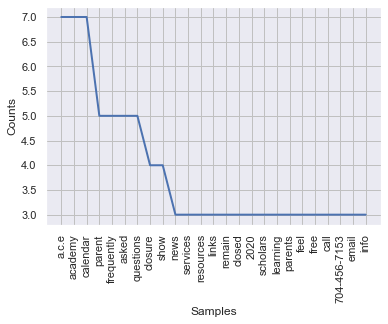

In [192]:
cleaned_freqdist.plot(25)

### Social Media Data Frame Scraper

In [111]:
listOfUrlAddress=list(modelingRecord['urlAddress'])
socialMediaDataFrame = pd.DataFrame()
import urllib3
urllib3.disable_warnings()
for eachAddress in listOfUrlAddress:
    listOfSocialMediaValues=[]
    listOfValidUrlAddress=[]
    problemLink = False
    RequestedPage= requests.get(eachAddress, headers=headers, verify=False)
    if (RequestedPage.status_code != 200):
        print (eachAddress + " does not work please check hyperlink again")
        problemLink= True #lmao its not being used at this time 
        # add an extra np.nan if you have another social media
        listOfSocialMediaValues = [np.nan,np.nan,np.nan,np.nan,np.nan,np.nan]
    else:
        for eachSocialMedia in socialMediaList:
            contentFromRequestAddress = RequestedPage.text.lower()
            if(contentFromRequestAddress.find(eachSocialMedia) == -1):
                # Pass the row elements as key value pairs to append() function 
                listOfSocialMediaValues.append(0)
            else:
                listOfSocialMediaValues.append(1)
        
    listOfSocialMediaValues.append(eachAddress)
    hasMediaframe = pd.DataFrame(([listOfSocialMediaValues]) , columns=socialMediaList + ['urlAddress'] )
    socialMediaDataFrame = socialMediaDataFrame.append(hasMediaframe)

http://www.roxborocommunityschool.org does not work please check hyperlink again


In [3]:
#modelingRecord=pd.merge(modelingRecord , socialMediaDataFrame, on = 'urlAddress', how = 'left' )
#modelingRecord.to_csv('modelingRecord.csv')

### CharterSchool Analysis


In [2]:
modelingRecord = pd.read_csv('modelingRecordWithLinks.csv')

In [6]:
corpusFileName=list(modelingRecord['corpusFileName'].unique())

In [7]:
corpusFileName

['aceacademycharter.org',
 'alphaacademy.education',
 'arsnc.org',
 'acacharter.com',
 'aahsnc.org',
 'arapahoecharter.org',
 'aristotle.teamcfa.school',
 'artspacecharter.org',
 'ascendleadershipacademy.org',
 'bluegreenacademy.org',
 'beargrasscharter.org',
 'bcmschool.com',
 'bethelhill.net',
 'bradfordprep.org',
 'brevard.teamcfa.school',
 'bridgesacademy.us',
 'cisrobeson.org/cis-academy',
 'cabarruscharter.org',
 'cfci.net',
 'cardinalcharter.org',
 'carolina.teamcfa.school',
 'ciscomets.com',
 'carterschool.org',
 'cartergwoodsonschool.org',
 'cemcs.org',
 'cpscnc.org',
 'centralwakehs.com',
 'charlottelabschool.org',
 'charlottesecondary.org',
 'charterdayschool.net',
 'chathamcharter.org',
 'cgsnc.org',
 'coastalprep.teamcfa.school',
 'commonwealthhs.com',
 'cpcsnc.org',
 'csdspartans.org',
 'concordlakeacademy.org',
 'cornerstone.teamcfa.school',
 'corvian.org',
 'crosscreekcharterschool.com',
 'davidsoncharter.org',
 'dillardacademy.org',
 'discoverycharterdurham.org',
 'dou

In [49]:
povertySchool1FileName=list(modelingRecord[modelingRecord['Poverty Level'] == '1']['corpusFileName'])
povertySchool2FileName=list(modelingRecord[modelingRecord['Poverty Level'] == '2']['corpusFileName'])
povertySchool3FileName=list(modelingRecord[modelingRecord['Poverty Level'] == '3']['corpusFileName'])

In [51]:
poverty1TokenizedList = [] 
poverty2TokenizedList = []
poverty3TokenizedList = [] 
for eachFileName in corpusFileName:
    try:
        with open(f'D:/Dropbox/CharterSchoolWebAnalysis/charterSchoolCorpus/{eachFileName}.text', 'r', encoding ='utf-8') as f:
            x = f.read().splitlines()
        if (eachFileName in povertySchool1FileName):
            poverty1TokenizedList += x
        elif (eachFileName in povertySchool2FileName):
            poverty2TokenizedList += x
        else:
            poverty3TokenizedList += x
    except:
        print(f'{eachFileName}.text didnt work' )

alphaacademy.net.text didnt work
aristotle.teamcfa.org.text didnt work
bridgesacademy.us.text didnt work
carolinacharter.org.text didnt work
cornerstone.teamcfa.org.text didnt work
forsyth.heritageacademies.com.text didnt work
nhaschools.comschoolsgatecity.text didnt work
greensboroacademy.org.text didnt work
kippenc.orgschool-detailskipp-durham-college-prep-public-school.text didnt work
matthewscharteracademy.org.text didnt work
nhaschools.comschoolspeak.text didnt work
pccharter.org.text didnt work
pinespringsprep.org.text didnt work
preeminentcharterschool.org.text didnt work
queensgrantcommunityschool.org.text didnt work
researchtriangle.heritageacademies.com.text didnt work
roxborocommunityschool.org.text didnt work
shiningrock.org.text didnt work
southeasternacademy.org.text didnt work
scstemacademy.org.text didnt work
successinstitutecharterschool.com.text didnt work
nhaschools.comschoolssummerfield.text didnt work
tworiverscommunityschool.net.text didnt work
unityclassical.como

In [66]:
def cleanTokenizedList(povertyTokenizedList):
    povertyTokenizedList = [str(i) for i in povertyTokenizedList]
    povertyTokenizedList = [re.sub('[^a-zA-Z]+', '', _) for _ in povertyTokenizedList]
    povertyTokenizedList = list(filter(None, povertyTokenizedList))
    povertyTokenizedList = [ w for w in povertyTokenizedList if w not in nltk_stopwords_list]
    return povertyTokenizedList


poverty1TokenizedList = cleanTokenizedList(poverty1TokenizedList)
poverty2TokenizedList = cleanTokenizedList(poverty2TokenizedList)
poverty3TokenizedList = cleanTokenizedList(poverty3TokenizedList)


In [67]:
cleaned_freqdist = FreqDist(poverty1TokenizedList)

In [68]:
cleaned_freqdist

FreqDist({'th': 49560, 'student': 19082, 'math': 18085, 'may': 17964, 'students': 17582, 'board': 16664, 'information': 15885, 'academy': 14872, 'nc': 14278, 'middle': 14023, ...})

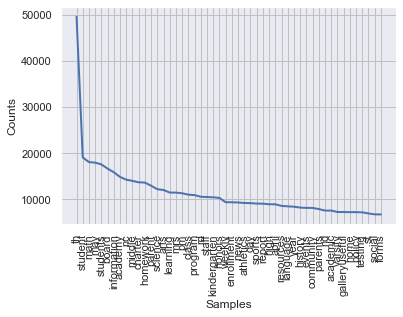

In [69]:
cleaned_freqdist.plot(50)

In [70]:
cleaned_freqdist = FreqDist(poverty2TokenizedList)

In [71]:
cleaned_freqdist

FreqDist({'academy': 1680, 'students': 1220, 'parent': 1153, 'nc': 1079, 'charter': 1063, 'student': 1039, 'learning': 800, 'board': 792, 'information': 792, 'qe': 787, ...})

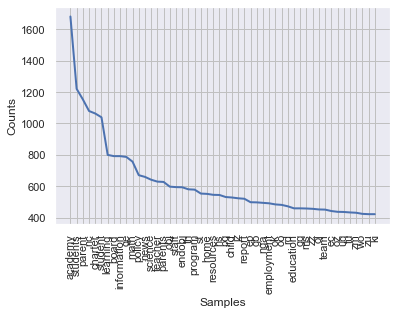

In [72]:
cleaned_freqdist.plot(50)

In [73]:
cleaned_freqdist = FreqDist(poverty3TokenizedList)

In [74]:
cleaned_freqdist

FreqDist({'kipp': 16182, 'enc': 6878, 'students': 5319, 'college': 4873, 'academy': 4815, 'nc': 4597, 'charter': 3549, 'th': 3406, 'board': 3319, 'staff': 3255, ...})

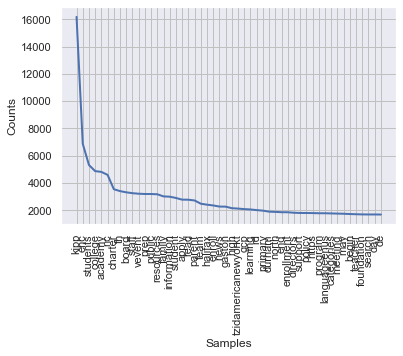

In [75]:
cleaned_freqdist.plot(50)

In [ ]:
df.groupby(['A','C'])